Last time we were performing Sentiment Classification with NB and explored 2 areas of Artificial Intelligence: Machine Learning (supervised learning) and Natural Language Processing (identifying sentiment of a text).

In this assignment we will explore unsupervised learning (Machine Learning) on an image data (Vision).

We will explore KMeans clustering and apply it to Fashion-MNIST dataset:


*   KMeans: https://scikit-learn.org/stable/modules/clustering.html#k-means
*   Fashion-MNIST: https://www.kaggle.com/datasets/zalando-research/fashionmnist/code?datasetId=2243&searchQuery=cluster



In [ ]:
### Install Dash
!pip install -q dash
!pip install -q jupyter_dash
# !pip install dash==0.31.1  # The core dash backend
!pip install dash-html-components # HTML components
!pip install dash-core-components # Supercharged components
!pip install dash-table   # Interactive DataTable component (new!)

# We start by importing all required libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.decomposition import PCA
import plotly.express as px
import dash_html_components as html
from jupyter_dash import JupyterDash
import dash_core_components as dcc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cdist

%matplotlib inline

     |████████████████████████████████| 9.8 MB 4.3 MB/s 
     |████████████████████████████████| 357 kB 78.7 MB/s 
     |████████████████████████████████| 1.6 MB 6.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`


In [ ]:
# Mount your G-Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data analysis

In [ ]:
# Import train and test sets into 2 different variables
train_data =pd.read_csv("/content/drive/MyDrive/data/fashion-mnist_train.csv") 
test_data =pd.read_csv("/content/drive/MyDrive/data/fashion-mnist_test.csv") 

train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
# Print the first 15 rows of your train set and see how it stored
# Include in the report your observations, i.e. how it is stored, how many pixels are there, their range, etc.

# Your code here:
train_data.head(15)
# print(var)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [ ]:
# Unsupervised learning assumes no true labels is available 
# Let's create 2 variable: first holds labels, second holds only imagies (i.e. arrays of pixels)
train_label =train_data.loc[:, train_data.columns == 'label'].to_numpy()  # store labels here
train_imgs = train_data.loc[:, train_data.columns != 'label'].to_numpy()# store data without labels here
# print(train_label)
test_label = test_data.loc[:, test_data.columns == 'label'].to_numpy()  # store labels here
test_imgs = test_data.loc[:, test_data.columns != 'label'].to_numpy()

#train_label =  # store labels here
#train_imgs = # store data without labels here

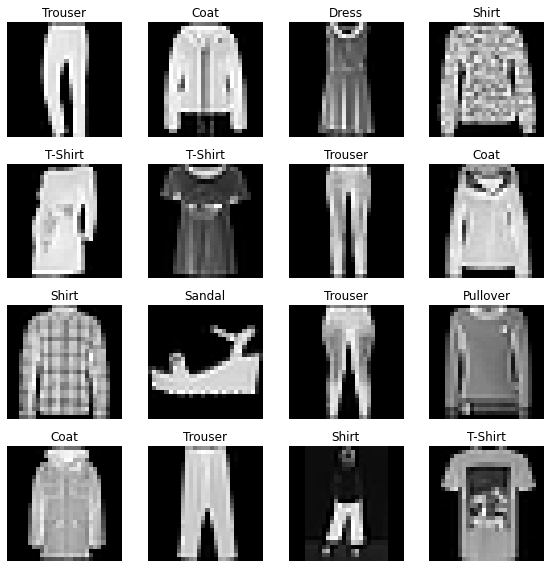

In [ ]:
# Let's take a look at our images

# First, let's create a maping of a numerical label into an actual class description
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 4
rows = 4
fig = plt.figure(figsize=(8, 8))

# Now, let's display images
# Include the output into your report
for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_imgs))
    img = train_imgs[data_idx].reshape([28, 28])
    label = labels_map[train_label[data_idx][0]]
    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [ ]:
# Let's normalize the data
# Create an instance of StandardScaler and fit_transform it on your train images

# Your code here:
scaler = StandardScaler()
train_imgs_scaler = scaler.fit_transform(train_imgs)
test_imgs_scaler = scaler.transform(test_imgs)

Clustering algorithm groups data points together because of certain similarities. Let's see if you can identify clusters by analysing their placements in the feature space.

To do this, we need to map our multi-dimensional space into a 2d or 3d space.
Here, we will use a PCA algorithm. More on this approach you can find here:
https://scikit-learn.org/stable/modules/decomposition.html#pca

In [ ]:
# Create an instance of PCA with 2 principal components
# refer to https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca = PCA(n_components=2)
# Fit your pca instance on normalized data
components=pca.fit_transform(train_imgs)

In [ ]:
# Let's take a look at our 2D space
fig = px.scatter(components[:8000], x=0, y=1)
# build jupyter dash app 
app = JupyterDash(__name__)
 # add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
 # run app inline
app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

Can you identify any clusters based on 2D plot? Which ones?

Plotly has an optional 'color' parameter, try to specify it by providing 'test_labels' and see if it helps. Remember, that any clustering algorithm does not use labels at any time.

Include your observations and rendered plots into the report.

In [ ]:
# Let's take a look at our 2D space
fig = px.scatter(components[:8000], x=0, y=1, color=1)
# build jupyter dash app 
app = JupyterDash(__name__)
 # add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
 # run app inline
app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

In [ ]:
# Now, let's repeat the same process but for 3D space
# Create a pca instance with 3 principal components
pca = PCA(n_components=3)
# Fit your pca instance on normalized data
components = pca.fit_transform(train_imgs)





In [ ]:
# For a 3D instance let's take a look at first 1000 images
fig = px.scatter_3d(components[:1000], x=0, y=1, z=2)
# build jupyter dash app 
app = JupyterDash(__name__)
 # add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
 # run app inline
app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

Can you identify any clusters based on 3D plot? Which ones?

Plotly has an optional 'color' parameter, try to specify it by providing 'test_labels' and see if it helps. Remember, that any clustering algorithm does not use labels at any time.

Include your observations and rendered plots into the report.

In [ ]:
# For a 3D instance let's take a look at first 1000 images
fig = px.scatter_3d(components[:1000], x=0, y=1, z=2, color=0 )
# build jupyter dash app 
app = JupyterDash(__name__)
 # add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
 # run app inline
app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

### KMeans clustering

KMeans clustering depends on 'k' - number of clusters. Typically, this number is unknown, but there are methods that helps you to identify an optimal value.

In this assignment, we will use elbow method:
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
# We will calculate values of distortion and inertia and store them for further analysis.
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

# Specify a range for K
# Try different ranges (e.g. (1,5), (5,15), (1,30)) and find an optimal one
K = range(10,50)
  
for k in K:
    # Create an instance of a MiniBatchKMeans model
    # specify n_clusters as an index k
    kmeanModel = MiniBatchKMeans(n_clusters=k)
    # Fit your model to train_std (1line):
    kmeanModel.fit(train_imgs,train_label)
  
    distortions.append(sum(np.min(cdist(train_imgs, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / train_imgs.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(train_imgs, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / train_imgs.shape[0]
    mapping2[k] = kmeanModel.inertia_

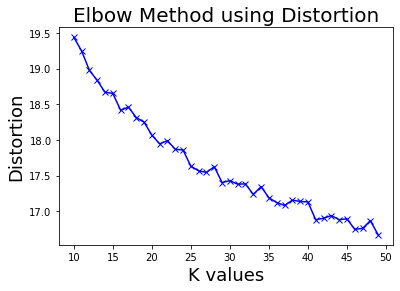

In [ ]:
# Create K vs distortions plot
# Use plt.plot()
# Your code here:
plt.plot(K, distortions, 'bx-')
plt.title('Elbow Method using Distortion', fontsize=20)
plt.xlabel('K values', fontsize=18)
plt.ylabel('Distortion', fontsize=18)

plt.show()


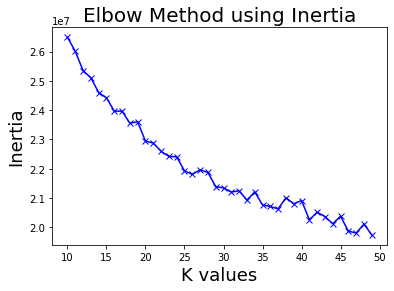

In [ ]:
# Create K vs inertias plot
# Use plt.plot()
# Your code here:
plt.plot(K, inertias, 'bx-')
plt.xlabel('K values', fontsize=18)
plt.ylabel('Inertia', fontsize=18)
plt.title('Elbow Method using Inertia', fontsize=20)
plt.show()


In [ ]:
# Based on the elbow method, specify an optimal value for the total number of clusters
total_no_of_clusters = 14
# Initialize the K-Means model, we will use mini batch kmeans 
# https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans
# Create an instance of a mini batch kmeans
kmeans = MiniBatchKMeans(n_clusters=total_no_of_clusters)
# Fit the model to training set
kmeans.fit(train_imgs, train_label)


MiniBatchKMeans(n_clusters=14)

In [ ]:
# Now, let's take a look at our centroids
# Extract cluster centroids by accessing 'cluster_centers_' attribute of kmeans
# rEFER TO https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans

centroids = kmeanModel.cluster_centers_
# Reshape them for displaying purposes
centroids = centroids.reshape(49,28,28)


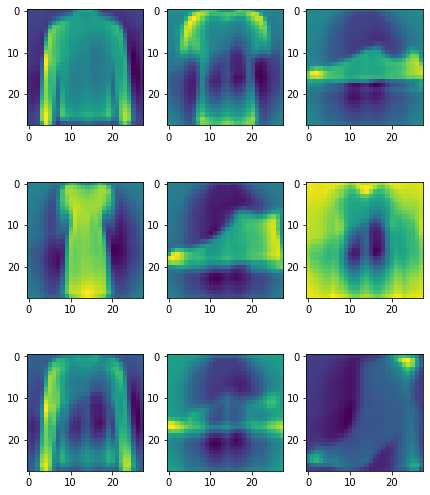

In [ ]:
# Display them on a 3 by 3 grid
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(9):
  plt.subplots_adjust(bottom)
  plt.subplot(3,3,i+1)
  plt.imshow(centroids[i])

Based on this picture, how would you describe resulted clusters based on their centroids. Include your thoughts and picture into the report.

### KMeans for classification

We can further use our fitted instance to classify unseen images (i.e. test set).

In [ ]:
# Let's create 2 variable: first holds labels, second holds only imagies (i.e. arrays of pixels) of our test set
y_test = test_label
x_test = test_imgs


In [ ]:
# KMeans identifies clusters and assigns labels to them. 
# Unfortunately, these labels won't correspond to true labels.
# Let's create a function, that will produce a mapping of kmeans labels to true labels
def retrieve_info(cluster_labels,y_train):
  '''
  Associates most probable label with each cluster in KMeans model
  returns: dictionary of clusters assigned to each label
  '''
 # Initializing
  reference_labels = {}
 # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  
  return reference_labels

In [ ]:
# Here is a sample code of how to transform kmeans' predictions on a train set
# reference_labels = retrieve_info(kmeans.labels_,train_label)
predictions = kmeans.predict(test_imgs)
# Let's take a look at the first 20 predictions
# Use the same function as above
# Your code here:

# for i in range(len(kmeans.labels_)):  
#   predictions[:40]
predictions[:40]

array([ 3,  4, 13,  3, 12,  0,  9,  0, 13, 13,  8,  0,  8,  0,  6, 13,  1,
       12,  1,  0,  8,  1,  0,  4,  2,  9,  6,  0,  1,  4,  9,  2,  9,  6,
        4, 13,  5,  1, 12, 12], dtype=int32)

In [ ]:
# Comparing Predicted values and Actual values
print(predictions[:20])
print(train_label[:20])

[ 3  4 13  3 12  0  9  0 13 13  8  0  8  0  6 13  1 12  1  0]
[[2]
 [9]
 [6]
 [0]
 [3]
 [4]
 [4]
 [5]
 [4]
 [8]
 [0]
 [8]
 [9]
 [0]
 [2]
 [2]
 [9]
 [3]
 [3]
 [3]]


In [ ]:
# Now, similar to assignment 1, analyse the performance of your kmeans algorithm
# Predict the closest cluster each sample in the test set belongs to.
# Map predictions into the original label space (use reference_labels mapping)
# Calculate precision, recall, accuracy and display confusion matrix
# Analyse your results, include them and your thoughts into the report

Accuracy: 0.0315
Precision: 0.042881820875600295
Recall: 0.0225
F1: 0.028659745110531803


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



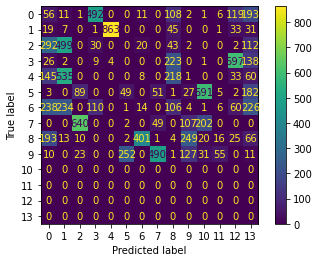

In [ ]:
# Your code here: 
from sklearn import metrics
test_label = [e for e in test_label]
print("Accuracy:", metrics.accuracy_score(test_label, predictions))
print("Precision:", metrics.precision_score(test_label, predictions, average='macro'))
print("Recall:", metrics.recall_score(test_label, predictions, average='macro'))
print("F1:", metrics.f1_score(test_label, predictions, average='macro'))
disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(test_label, predictions))
disp.plot()
